In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
#%matplotlib qt
%matplotlib inline

In [3]:
"""plot style"""
linewidth = 4
mpl.rc('axes', linewidth=linewidth)
mpl.rc('font', family='Arial')
fontsize = 24


colors = {'no_inj': [0.8, 0.8, 0.8],
         'mock': [0.4, 0.4, 0.4],
         'e.coli': [0, 0.4, 0],
         'complete': [0, 0.8, 0]}

def style_axes(ax, fontsize=24):
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    plt.tight_layout()
    
    return ax


## plot stacked bar plot showing percentages of complete vs partial responses

In [4]:
genes = ['DptA', 'AttA', 'CecA1', 'Def', 'Dro', 'Drs', 'Mtk']

In [8]:
"""manually tabulated response classifications: no response, partial response, complete response, total animals"""
numbers = np.zeros((len(genes), 4))

# Diptericin
numbers[0] = np.array([0, 12, 8, 20])

# Attacin
numbers[1] = np.array([0, 0, 7, 7])

# Cecropin
numbers[2] = np.array([8, 3, 0, 11])

# Defensin
numbers[3] = np.array([10, 2, 0, 12])

# Drosocin
numbers[4] = np.array([0, 3, 11, 14])

# Drosomycin
numbers[5] = np.array([0, 0, 8, 8])

# Metchnikowen
numbers[6] = np.array([2, 7, 2, 11])

fractions = np.zeros((len(genes), 3))
for i in range(len(fractions)):
    fractions[i] = numbers[i, :-1] / numbers[i, -1]

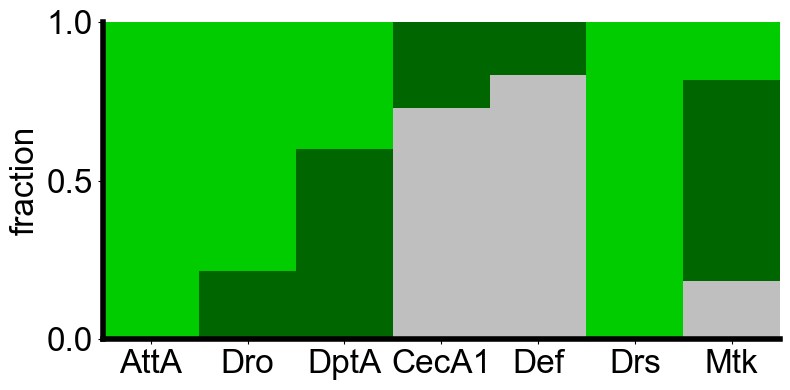

In [9]:
fraction_colors = [[0.5, 0.5, 0.5, 0.5], colors['e.coli'], colors['complete']]
ids = [1, 4, 0, 2, 3, 5, 6]

plt.figure(figsize=(8,4))
for i in range(len(fractions)):
    bottom = 0
    for j in range(len(fractions[ids[i]])):
            plt.bar(i, fractions[ids[i], j], bottom=bottom, width=1, color=fraction_colors[j])
            bottom += fractions[ids[i], j]
plt.xlim([-0.5, len(fractions) - 0.5])
plt.xticks(np.arange(len(fractions)), labels=[genes[i] for i in ids])
plt.yticks([0, 0.5, 1])
plt.ylabel('fraction', fontsize=fontsize)
ax = style_axes(plt.gca())

In [51]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/other_AMPs/amp_screen_fractions.pdf')